In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from matplotlib.ticker import FuncFormatter

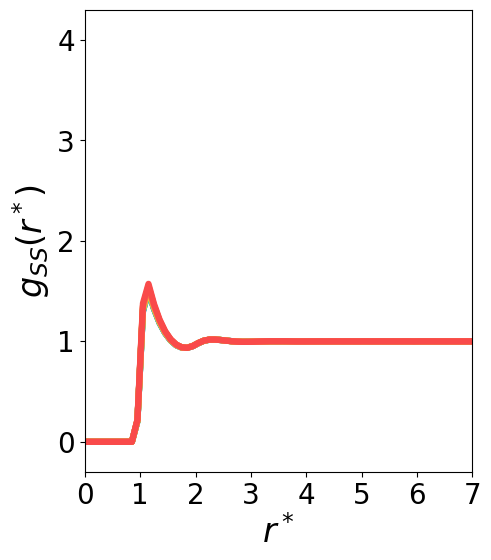

In [ ]:
# main
base_dir = "./" 
os.chdir(base_dir)

gzz_files = sorted(glob.glob("gss_MD_0.2_WCA_*.csv"))
fit_params = pd.read_csv("ssfit_params_MD_0.2_WCA.csv")


r_values = fit_params["r_value"].tolist() if "r_value" in fit_params.columns else \
           [float(name.split("_")[-1].replace(".csv","")) for name in gzz_files]
lambda_d = fit_params["lambda_debye"].tolist()

colors_hex = [
    '#6b4ad3', '#4a99d3', '#4ac0d3', '#4ad3a3', '#70d34a',
    '#b3d34a', '#e9c84a', '#f9ae4a', '#f98c4a', '#f96a4a', '#f94a4a'
]

plt.figure(figsize=(5,6))

plt.ylim(-0.3, 4.3)
plt.xlim(0,7)
plt.xticks([0,1,2,3,4,5,6,7], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r^*$', fontsize=24)
plt.ylabel(r'$g_{SS}(r^*)$', fontsize=24)

vertical = [0,0,0,0,0,0,0,0,0,0,0]

for i, (r_value, color) in enumerate(zip(r_values, colors_hex)):
    file = f"gss_MD_0.2_WCA_{r_value}.csv"
    data = pd.read_csv(file)

    x = np.array(data["r"])
    y = np.array(data["gSS_mean"])
    yerr = data["gSS_err"]


    plt.plot(x, y, linestyle="-", color=color, linewidth=4.5, label=f"r={r_value}")
    plt.fill_between(x, np.abs(yerr-y), np.abs(yerr+y), color = color, alpha=0.4)

plt.show()


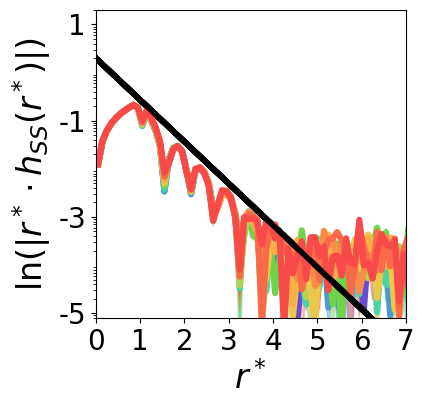

In [ ]:
# inset
base_dir = "./" 
os.chdir(base_dir)

gzz_files = sorted(glob.glob("gss_MD_0.2_WCA_*.csv"))
fit_params = pd.read_csv("ssfit_params_MD_0.2_WCA.csv")


r_values = fit_params["r_value"].tolist() if "r_value" in fit_params.columns else \
           [float(name.split("_")[-1].replace(".csv","")) for name in gzz_files]
lambda_d = fit_params["lambda_debye"].tolist()

colors_hex = [
    '#6b4ad3', '#4a99d3', '#4ac0d3', '#4ad3a3', '#70d34a',
    '#b3d34a', '#e9c84a', '#f9ae4a', '#f98c4a', '#f96a4a', '#f94a4a'
]

def fit_function(r, A, l, omega, phi):
    return A * np.exp(-r / l) * np.abs(np.cos(omega * r + phi))

def fit_function_simple(r, A, l):
    return A * np.exp(-r / l)


plt.figure(figsize=(4,4))

plt.xlabel(r'$r^*$', fontsize=24)
plt.ylabel(r'ln$(|r^* \cdot h_{SS}(r^*)|)$', fontsize=24)

plt.yscale("log")
yticks = [1e-5, 1e-3, 1e-1, 1e1]  
yticklabels = ['-5', '-3', '-1', '1']
plt.ylim(8e-6, 2e1)
plt.xlim(0, 7)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], fontsize=20)
plt.yticks(yticks, yticklabels, fontsize=20)

vertical = [0,0,0,0,0,0,0,0,0,0,0]

for i, (r_value, color) in enumerate(zip(r_values, colors_hex)):
    file = f"gss_MD_0.2_WCA_{r_value}.csv"
    data = pd.read_csv(file)

    x = np.array(data["r"])
    y = np.array(data["gSS_mean"])
    y = y-1
    y = np.abs(x*y)
    yerr = data["gSS_err"]

    params = fit_params.iloc[i]
    A_fit = params["A_fit"]
    lambda_fit = params["lambda_fit"]
    omega_fit = params["omega_fit"]
    phi_fit = params["phi_fit"]
    lambda_fit_err = params["lambda_fit_error"]
    lambda_fit_err = np.array(lambda_fit_err)

    plt.plot(x, y/4, linestyle="-", color=color, linewidth=4.5, label=f"r={r_value}")
    plt.fill_between(x, np.abs(yerr-y)/4, np.abs(yerr+y)/4, color = color, alpha=0.4)

    x_guide = np.linspace(0,7, 100)
    y_guide = 2*np.exp(-x_guide/0.5)#/x_guide
    plt.plot(x_guide, y_guide, linestyle="-", color="black", linewidth=4)
plt.show()
